In [49]:
import pandas as pd
import numpy as np
import plotly.express as px

In [51]:
df = pd.read_csv("climate_change_indicators.csv")

In [52]:
df.sample(2)

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
140,141,Nepal,NP,NPL,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.189,0.337,0.654,1.169,1.071,0.627,0.854,0.229,0.632,1.132
55,56,Dominica,DM,DMA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.715,0.704,0.918,1.057,0.821,0.561,0.752,1.087,0.727,0.688


In [23]:
df["Indicator"].value_counts()

Indicator
Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980    225
Name: count, dtype: int64

In [22]:
df.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')

In [43]:
# (°C × 9/5) + 32 = °F
def to_far(num):
    far = (num*(9/5)+32)
    return np.round(far,decimals=2)

In [67]:
far = pd.DataFrame()
far["Country"] = df["Country"]
temp = ['F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022']
flag = 1961
for i in temp:
    far[f"In_far_{flag}"] = df[i].apply(to_far)
    flag = flag+1

In [57]:
df.head(2)

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518


In [58]:
df_melted = df.melt(var_name='Year', value_name='Temperature')

# Create the plot
fig = px.line(df_melted, x='Year', y='Temperature', title='Temperature Over Years')

# Show the plot
fig.show()

In [61]:
list(df["Country"].unique())

['Afghanistan, Islamic Rep. of',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra, Principality of',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia, Rep. of',
 'Aruba, Kingdom of the Netherlands',
 'Australia',
 'Austria',
 'Azerbaijan, Rep. of',
 'Bahamas, The',
 'Bahrain, Kingdom of',
 'Bangladesh',
 'Barbados',
 'Belarus, Rep. of',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China, P.R.: Hong Kong',
 'China, P.R.: Macao',
 'China, P.R.: Mainland',
 'Colombia',
 'Comoros, Union of the',
 'Congo, Dem. Rep. of the',
 'Congo, Rep. of',
 'Cook Islands',
 'Costa Rica',
 'Croatia, Rep. of',
 'Cuba',
 'Cyprus',
 'Czech Rep.',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Rep.',
 'Ecuador',
 '

In [66]:
country_df = df[df["Country"] == "Albania"]
country_df = country_df.iloc[:,10:]
df_melted = country_df.melt(var_name='Year', value_name='Temperature')

# Create the plot
fig = px.line(df_melted, x='Year', y='Temperature', title='Temperature Over Years')

# Show the plot
fig.show()

In [64]:
df.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')

In [70]:
df.corr(numeric_only=True)

,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
ObjectId,1.000000,0.035419,0.028080,-0.035119,0.015547,-0.088232,-0.036316,0.053128,-0.015872,0.022866,...,-0.008656,-0.048261,-0.038270,0.019907,0.024568,-0.075639,-0.055777,-0.037094,-0.084133,-0.004132
F1961,0.035419,1.000000,-0.329083,-0.535702,0.225209,-0.448468,-0.117961,0.733194,0.015849,-0.546039,...,-0.092277,0.648516,0.395742,0.308652,0.261855,0.329751,0.412572,0.540589,-0.034898,0.458136
F1962,0.028080,-0.329083,1.000000,0.531962,-0.179892,0.324738,0.417417,-0.539587,0.029079,0.115170,...,0.398328,-0.252835,0.032628,0.161863,-0.111675,0.152200,-0.050059,-0.083622,0.309308,-0.030936
F1963,-0.035119,-0.535702,0.531962,1.000000,-0.254906,0.551574,0.147068,-0.648771,-0.185816,0.282556,...,0.276354,-0.373492,-0.041234,-0.236774,-0.050137,-0.058505,-0.322618,-0.302464,0.245769,-0.276210
F1964,0.015547,0.225209,-0.179892,-0.254906,1.000000,-0.010730,-0.392467,0.193783,-0.250130,-0.180343,...,-0.157437,0.073751,-0.217761,-0.027104,0.117280,-0.436696,-0.136422,0.064073,-0.219027,0.060852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F2018,-0.075639,0.329751,0.152200,-0.058505,-0.436696,-0.106528,0.345279,0.165231,0.126570,-0.275551,...,0.443715,0.708255,0.730154,0.579413,0.350194,1.000000,0.723247,0.642492,0.535544,0.632999
F2019,-0.055777,0.412572,-0.050059,-0.322618,-0.136422,-0.104356,0.320723,0.346691,0.086349,-0.264041,...,0.371832,0.669129,0.716235,0.671112,0.496803,0.723247,1.000000,0.737560,0.379136,0.608275
F2020,-0.037094,0.540589,-0.083622,-0.302464,0.064073,-0.142500,0.026835,0.456763,-0.028448,-0.279661,...,0.342565,0.759987,0.717798,0.647220,0.551753,0.642492,0.737560,1.000000,0.480732,0.680803
F2021,-0.084133,-0.034898,0.309308,0.245769,-0.219027,0.141195,0.224028,-0.104885,-0.076566,-0.066981,...,0.570064,0.398836,0.398961,0.469438,0.481258,0.535544,0.379136,0.480732,1.000000,0.572674


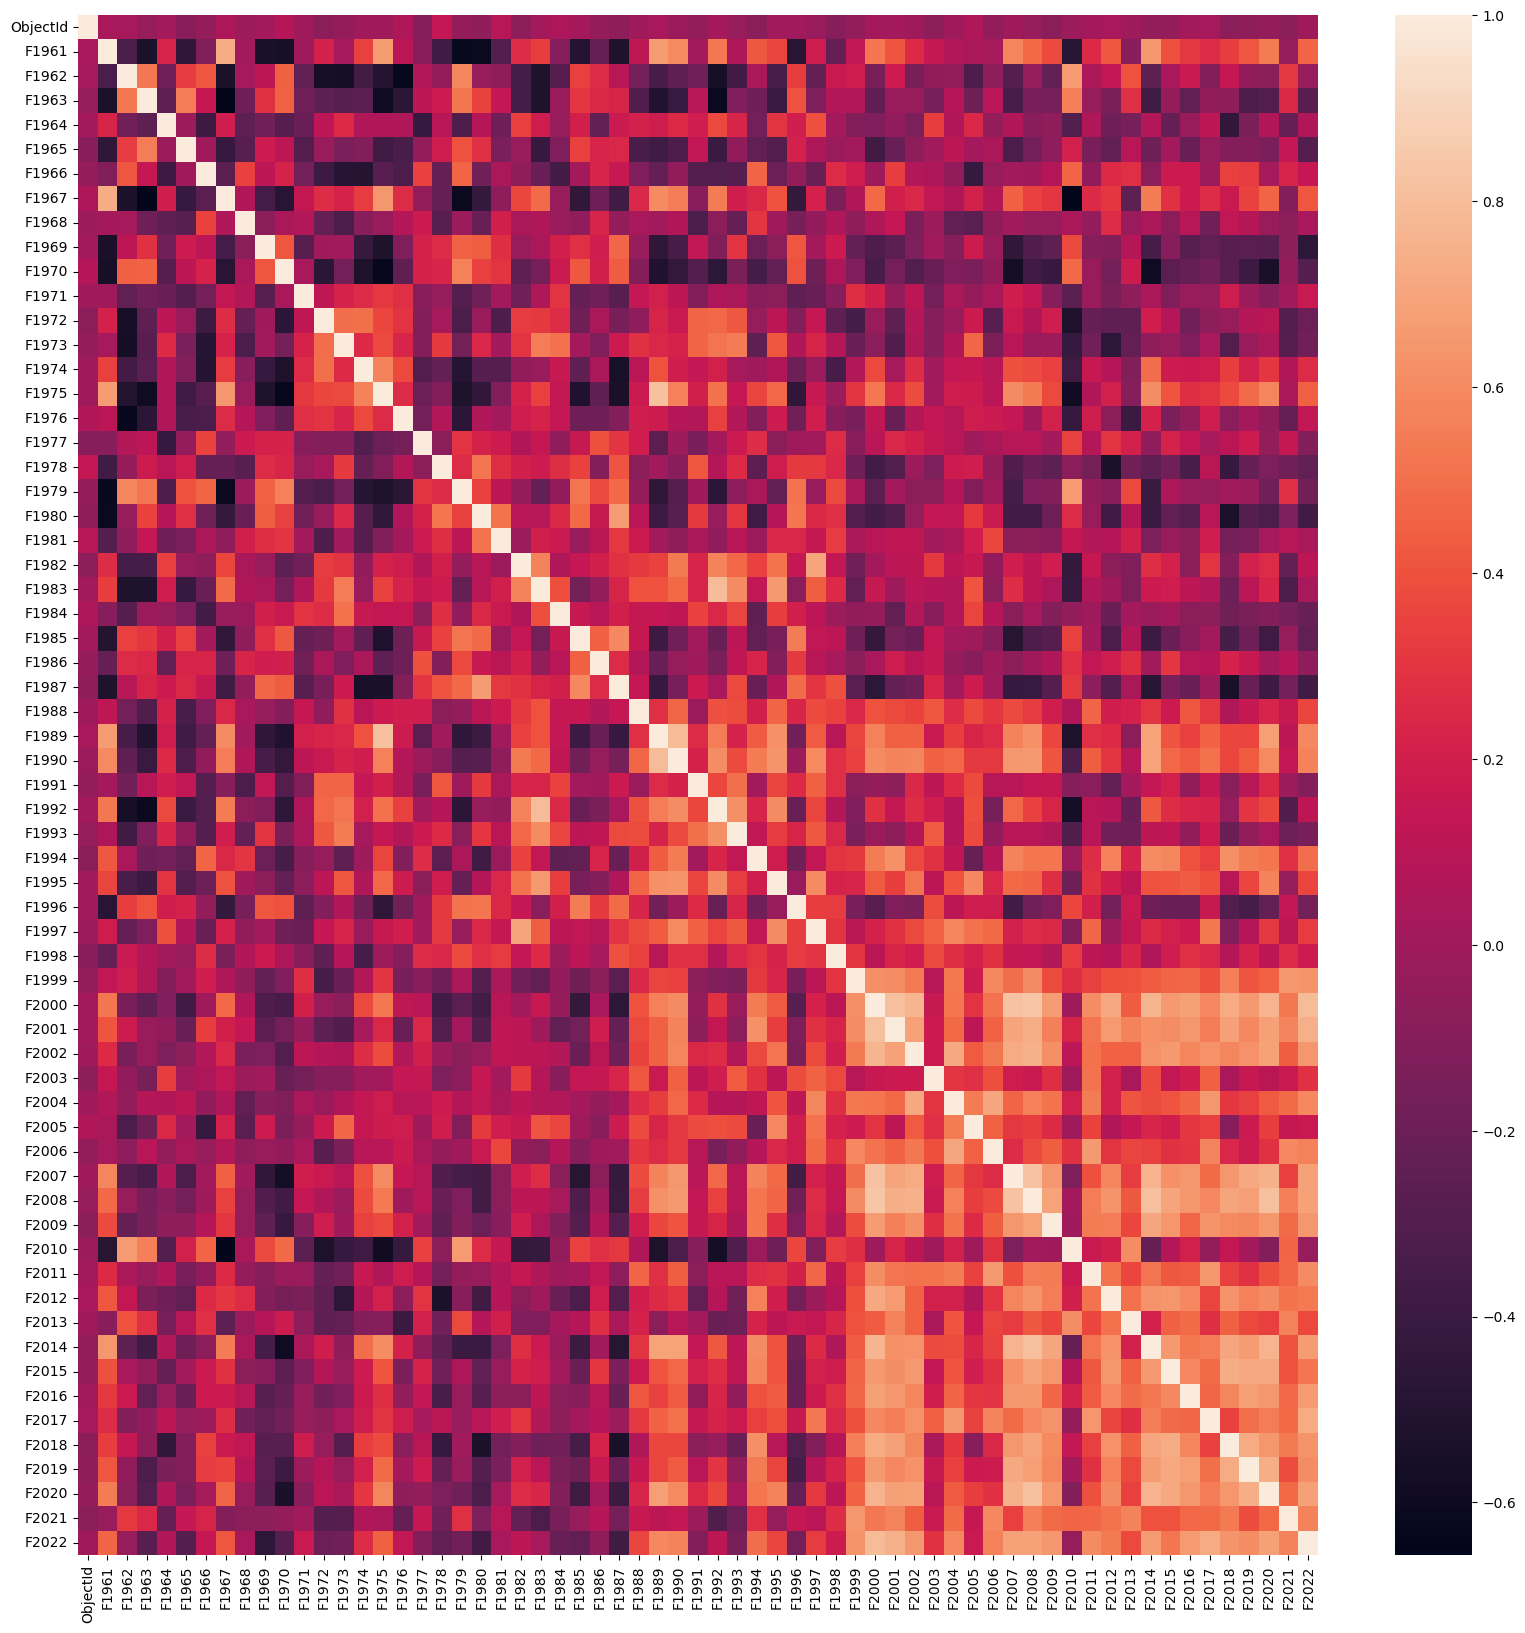

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True))
plt.show()

In [75]:
df.sample(2)

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
81,82,Guatemala,GT,GTM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.624,0.638,1.143,1.425,1.069,0.884,1.418,1.728,1.406,0.916
47,48,Cook Islands,CK,COK,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.455,0.158,-0.430,0.310,0.675,0.238,0.220,0.274,0.568,0.479


In [112]:
pd.DataFrame({"Values":new_df.iloc[:, 10:].values.flatten()})["Values"]

0     0.627
1     0.326
2     0.075
3    -0.166
4    -0.388
      ...  
57    2.028
58    1.675
59    1.498
60    1.536
61    1.518
Name: Values, Length: 62, dtype: float64

<>:8: SyntaxWarning:

invalid escape sequence '\d'

<>:8: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\AS's PC\AppData\Local\Temp\ipykernel_5020\1738035962.py:8: SyntaxWarning:

invalid escape sequence '\d'



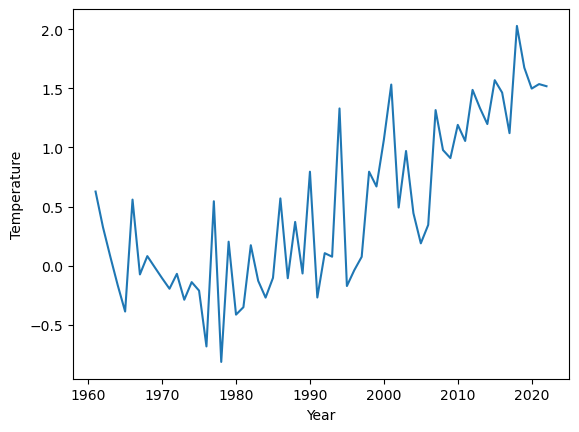

In [117]:
new_df = df[df["Country"] == "Albania"]

# Melt the DataFrame to long format
years = [col for col in new_df.columns if col.startswith("F")]
melted_df = new_df.melt(id_vars=["Country"], value_vars=years, var_name="Year", value_name="Temperature")

# Remove non-numeric characters from the 'Year' column
melted_df["Year"] = melted_df["Year"].str.extract('(\d+)').astype(int)

# Plot using Seaborn
sns.lineplot(x="Year", y="Temperature", data=melted_df)
plt.show()

In [118]:

import plotly.express as px

# Filter the DataFrame for Albania
new_df = df[df["Country"] == "Albania"]

# Melt the DataFrame to long format
years = [col for col in new_df.columns if col.startswith("F")]
melted_df = new_df.melt(id_vars=["Country"], value_vars=years, var_name="Year", value_name="Temperature")

# Remove non-numeric characters from the 'Year' column
melted_df["Year"] = melted_df["Year"].str.extract('(\d+)').astype(int)

# Plot using Plotly
fig = px.line(melted_df, x="Year", y="Temperature", title="Temperature Over Years for Albania")
fig.show()


<>:11: SyntaxWarning:

invalid escape sequence '\d'

<>:11: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\AS's PC\AppData\Local\Temp\ipykernel_5020\3784333785.py:11: SyntaxWarning:

invalid escape sequence '\d'



In [120]:
def column_names()->list:
    country_df = df[df["Country"] == "Algeria"]
    country_df = country_df.iloc[:, 10:]
    country_df.columns = [str(year) for year in range(1961, 2023)]
    col_names = country_df.columns
    return col_names


def helper_for_far(line_plot_temp, far):
    country_df = far[far["Country"] == line_plot_temp]
    country_df = country_df.iloc[:, 1:]
    # Ensure the columns are named correctly from 1961 to 2022
    country_df.columns = [str(year) for year in range(1961, 2023)]
    # Melt the DataFrame
    df_melted = country_df.melt(var_name='Year', value_name='Temperature')
    return df_melted

def helper_for_cel(line_plot_temp, df):
    country_df = df[df["Country"] == line_plot_temp]
    country_df = country_df.iloc[:, 10:]
    country_df.columns = [str(year) for year in range(1961, 2023)]
    # Melt the DataFrame
    df_melted = country_df.melt(var_name='Year', value_name='Temperature')
    return df_melted

def country_names(df):
    return list(df["Country"].unique())

# (°C × 9/5) + 32 = °F
def to_far(num):
    far = (num * (9/5) + 32)
    return np.round(far, decimals=2)


In [125]:
country_df = df[df["Country"] == "Albania"]
corr_matrix = country_df.corr(numeric_only=True)
#plt.imshow(corr_matrix, title='Correlation Matrix')
corr_matrix

,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
ObjectId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
temp_df = df[["Country"]]  # Convert to DataFrame by using double brackets
temp_df2 = df.iloc[:, 10:]

# Concatenate along the columns (axis=1)
data = pd.concat([temp_df, temp_df2], axis=1)


In [131]:
data

,Country,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,American Samoa,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Western Sahara,0.632,0.576,0.333,0.819,-0.337,0.284,-0.026,-0.368,0.383,...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,World,0.211,0.038,0.168,-0.246,-0.223,0.201,-0.117,-0.126,-0.092,...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,"Yemen, Rep. of",0.029,-0.009,0.169,-0.251,-0.623,0.089,-0.257,-0.252,0.262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,Zambia,0.228,-0.168,-0.390,-0.279,-0.418,0.300,-0.014,-0.130,0.243,...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [132]:
# i have made an Data Analysis project on streamlit where i can shows different plots and also the option to temperature in Celcius and farhenit and countries wise 
# now make an caution for my project to 

In [ ]:
from sklearn.preprocessing import 